# Outliers 

# 🔍 Why Do Outliers Matter?

# 🎯 Common Causes of Outliers

# What is boxplot?

In [5]:
import pandas as pd
import numpy as np

In [6]:
df = pd.read_csv("newplacementdata.csv")

In [7]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26,1
1,7.46,38,1
2,7.54,40,1
3,6.42,8,1
4,7.23,17,0


In [8]:
# even = ((n/2) + ((n/2)+1))/2
# odd = ((n/2)+1)

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df['placement_exam_marks'].describe()

# `df['placement_exam_marks'].describe()` gives a quick summary of the column
# , showing count, mean, standard deviation, min, 25%, 50% (median), 75%, and max values.


count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

<Axes: xlabel='placement_exam_marks'>

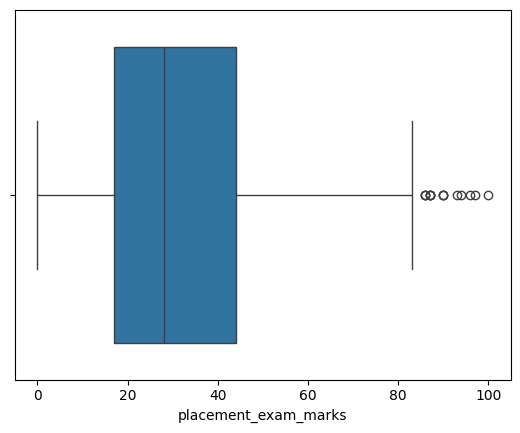

In [12]:
sns.boxplot(x = df["placement_exam_marks"])

# Explanation

# The code sns.boxplot(x = df["placement_exam_marks"]) creates a box plot for the placement_exam_marks column, which visually displays:
# The distribution of the marks (min, 25th percentile, median, 75th percentile, and max).
# Identifies any outliers (data points outside the whiskers).

In [13]:
print(df.columns)

Index(['cgpa', 'placement_exam_marks', 'placed'], dtype='object')


# Finding the IRQ

In [14]:
percentile25 = df['placement_exam_marks'].quantile(0.25)
percentile75 = df['placement_exam_marks'].quantile(0.75)

# Explanation

# it used to calculate the 25th percentile (Q1) and 75th percentile (Q3) of the placement_exam_marks column in your DataFrame (df).
# 25th percentile (Q1): The value below which 25% of the data falls.
# 75th percentile (Q3): The value below which 75% of the data falls.

In [15]:
percentile25

np.float64(17.0)

In [16]:
percentile75

np.float64(44.0)

In [17]:
# For Finding IQR

# Q3 - Q1


In [18]:
iqr = percentile75 - percentile25

In [19]:
iqr

np.float64(27.0)

In [20]:
upper_limit = percentile75 + 1.5 *iqr
lower_limit = percentile25 - 1.5 * iqr

In [21]:
print('Upper Limit ',upper_limit)
print('Lower Limit',lower_limit)

Upper Limit  84.5
Lower Limit -23.5


# Finding Outliers

In [22]:
df[df['placement_exam_marks'] > upper_limit]

,cgpa,placement_exam_marks,placed
9,7.75,94,1
40,6.60,86,1
61,7.51,86,0
134,6.33,93,0
162,7.80,90,0
283,7.09,87,0
290,8.38,87,0
311,6.97,87,1
324,6.64,90,0
630,6.56,96,1


In [23]:
df[df['placement_exam_marks'] < lower_limit]

,cgpa,placement_exam_marks,placed


# Trimming 

In [24]:
new_df = df[df['placement_exam_marks'] < upper_limit]

In [25]:
new_df.shape

(985, 3)

In [26]:
# Comparision

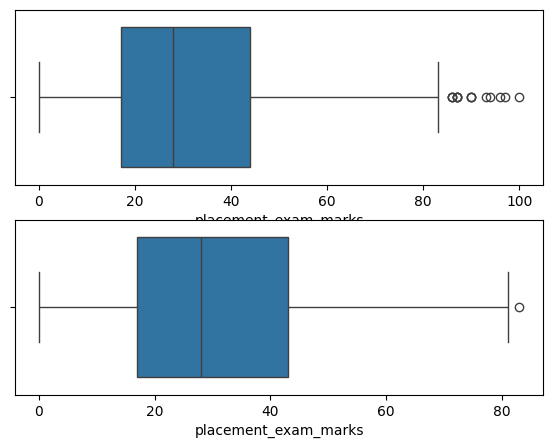

In [27]:
plt.figure(figsize= (15,5))

plt.subplot(222)
sns.boxplot(x = df['placement_exam_marks'])

plt.subplot(224)
sns.boxplot(x = new_df['placement_exam_marks'])
plt.show()

In [28]:
# Capping

In [29]:
new_df_cap = df.copy()

In [30]:
new_df_cap['placement_exam_values'] = np.where(
    new_df_cap['placement_exam_marks'] > upper_limit,
    upper_limit,

    np.where(
        new_df_cap['placement_exam_marks']<lower_limit,
        lower_limit,
        new_df_cap['placement_exam_marks'])
)

In [31]:
new_df_cap

,cgpa,placement_exam_marks,placed,placement_exam_values
0,7.19,26,1,26.0
1,7.46,38,1,38.0
2,7.54,40,1,40.0
3,6.42,8,1,8.0
4,7.23,17,0,17.0
...,...,...,...,...
995,8.87,44,1,44.0
996,9.12,65,1,65.0
997,4.89,34,0,34.0
998,8.62,46,1,46.0


In [32]:
# Comparision

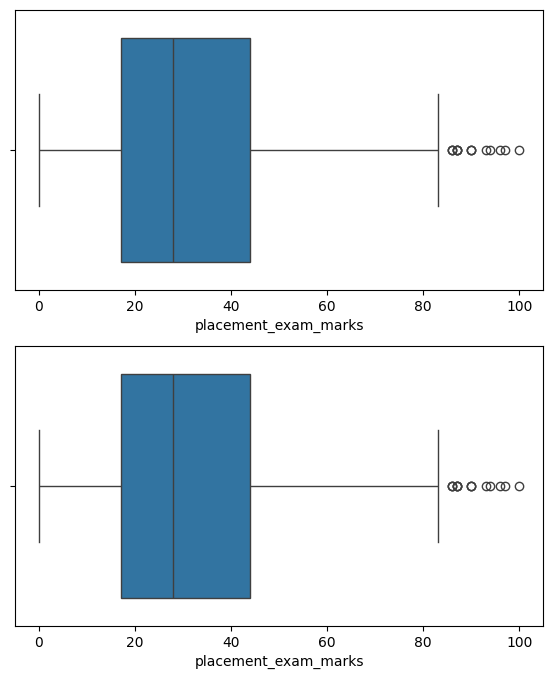

In [33]:
plt.figure(figsize= (15,8))

plt.subplot(222)
sns.boxplot(x = df['placement_exam_marks'])

plt.subplot(224)
sns.boxplot(x = new_df_cap['placement_exam_marks'])
plt.show()

#  Now we will use outliers on titanic dataset

In [34]:
df = pd.read_csv("titanic.csv")

In [35]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [40]:
df['Age'].describe()

count    332.000000
mean      30.272590
std       14.181209
min        0.170000
25%       21.000000
50%       27.000000
75%       39.000000
max       76.000000
Name: Age, dtype: float64

<Axes: xlabel='Age'>

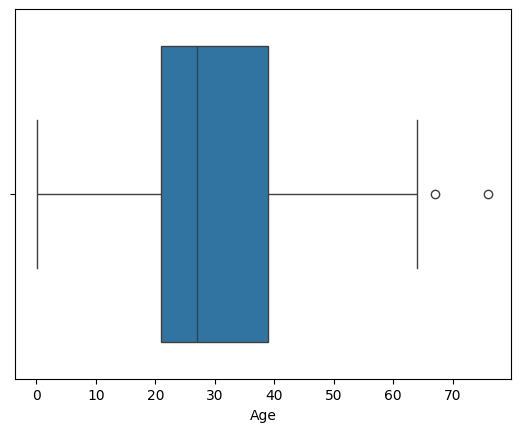

In [41]:
sns.boxplot(x = df['Age'])

In [42]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [47]:
percentile25 = df['Age'].quantile(0.25)
percentile75 = df['Age'].quantile(0.75)

In [48]:
percentile25

np.float64(21.0)

In [49]:
percentile75

np.float64(39.0)

In [50]:
# Finding Outliers

In [52]:
iqr = percentile75 - percentile25

iqr

np.float64(18.0)

In [53]:
upper_limit = percentile75 + 1.5 *iqr
lower_limit = percentile25 - 1.5 * iqr

In [54]:
print("Upper IQR",upper_limit)
print("Lower IQR",lower_limit)

Upper IQR 66.0
Lower IQR -6.0


In [97]:
# Finding Oultiers

In [55]:
df[df['Age'] > upper_limit]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
81,973,0,1,"Straus, Mr. Isidor",male,67.0,1,0,PC 17483,221.7792,C55 C57,S
96,988,1,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",female,76.0,1,0,19877,78.8500,C46,S


In [56]:
df[df['Age'] < lower_limit]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [57]:
# Trimming 

In [58]:
new_df = df[df['Age'] < upper_limit]

In [59]:
new_df.shape

(330, 12)

In [60]:
# Comparision

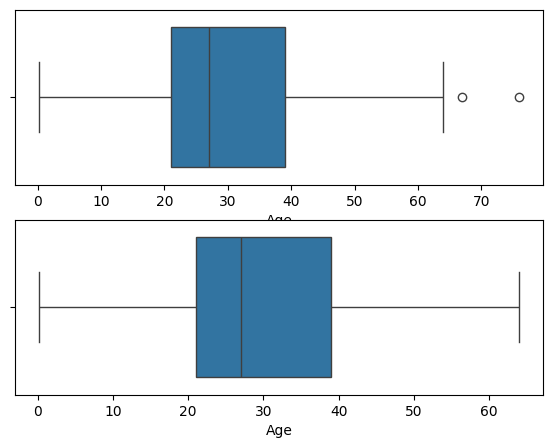

In [61]:
plt.figure(figsize= (15,5))

plt.subplot(222)
sns.boxplot(x = df['Age'])

plt.subplot(224)
sns.boxplot(x = new_df['Age'])
plt.show()